# Simple Image Processing Assignment
## by Tiffany Nguyen

### Process
- Work with a blood smear image
- Detect Red Blood Cells (RBCs)
- Create a binary image
- Black out non-RBC regions
- Plot histograms of RGB intensities for RBC cells

### Technology
Uses `OpenCV`, `NumPy`, and `Matplotlib` libraries

In [1]:
#install opencv
!pip install opencv-python

In [2]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read image
img = cv2.imread('/Users/tiffanynguyen/Downloads/tagged/SCU/BIOE 45/Lab/Lab3/blood_smear.jpg')

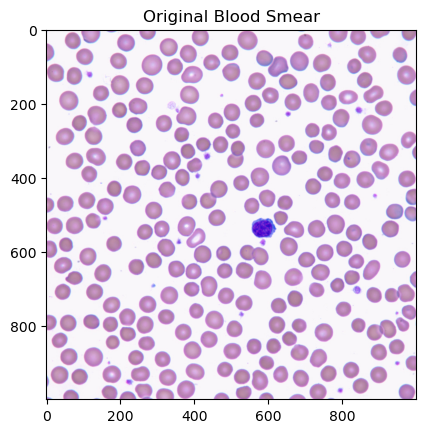

In [7]:
#Display original image using Matplotlib
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Blood Smear')
plt.show()

In [4]:
# Print General RGB Info to help find threshold
print('Maximum Red value {}'.format(img[:, :, 2].max()))
print('Minimum Red value {}'.format(img[:, :, 2].min()))
print('Maximum Green value {}'.format(img[:, :, 1].max()))
print('Minimum Green value {}'.format(img[:, :, 1].min()))
print('Maximum Blue value {}'.format(img[:, :, 0].max()))
print('Minimum Blue value {}'.format(img[:, :, 0].min()))
print('background RGB in top left', img[10, 10])
print('cell RGB in bottom right', img[990, 990])

Maximum Red value 255
Minimum Red value 35
Maximum Green value 255
Minimum Green value 1
Maximum Blue value 255
Minimum Blue value 119
background RGB in top left [249 246 248]
cell RGB in bottom right [183 115 168]


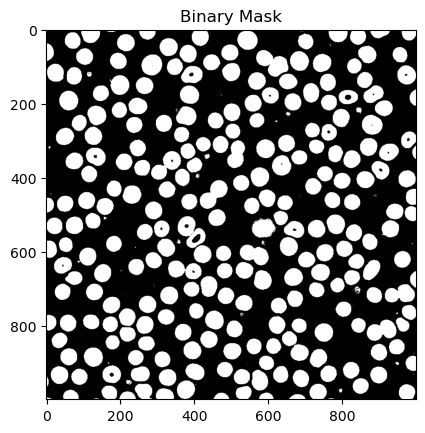

In [6]:
#Create binary mask to highlight red blood cell areas
# Define RGB threshold values so only the cells are in range
RGBHigh = np.array([240, 240, 240])
RGBLow = np.array([0, 0, 0])
# Create a binary mask within threshold range
binaryMask = cv2.inRange(img, RGBLow, RGBHigh)
# Display the binary mask
plt.figure()
plt.imshow(binaryMask, cmap='gray')
plt.title('Binary Mask')
plt.show()

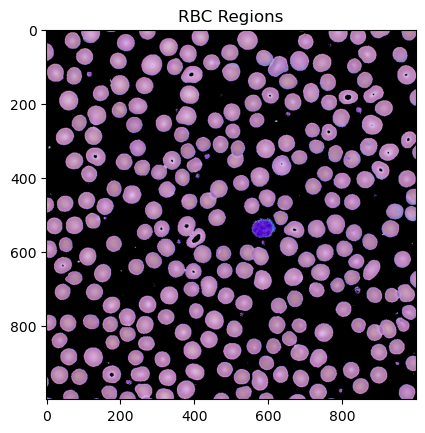

In [7]:
#Black out non-RBC regions in the original image
RBC = cv2.bitwise_and(img, img, mask=binaryMask)
plt.figure()
plt.imshow(cv2.cvtColor(RBC, cv2.COLOR_BGR2RGB))
plt.title('RBC Regions')
plt.show()

In [8]:
#Saved Processed Image
cv2.imwrite('/Users/tiffanynguyen/Downloads/tagged/SCU/BIOE 45/Lab/Lab3/RBC_Regions.jpg', RBC) #generates jpeg file

True

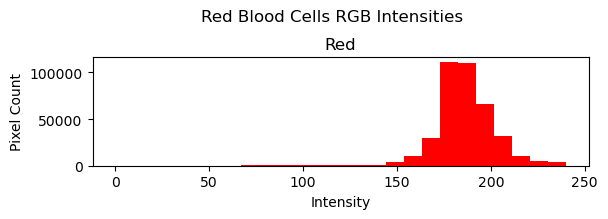

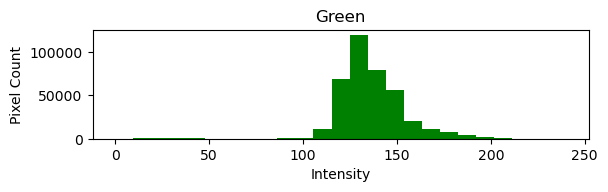

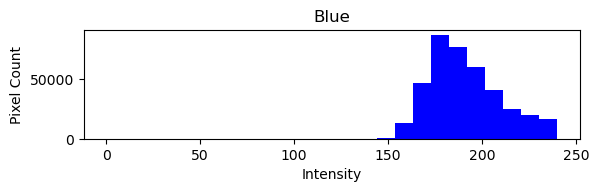

In [10]:
#Plot histograms of RGB intensities for RBC cells
plt.suptitle('Red Blood Cells RGB Intensities') #label overall plot
allColors = RBC[:, :, :].flatten() #get list of all values (to get overall min/max)

#Red Histogram
redIntensities = RBC[:, :, 2].flatten() #get red of all pixels
redIntensities = redIntensities[redIntensities != 0] #filter out 0 (mask)
redSubplot = plt.subplot(3, 1, 1) # make red subplot in top row, will have 1 column and 3 rows for subplots
redSubplot.set_title("Red") #Label subplot
redSubplot.set_xlabel("Intensity") #Label subplot x axis
redSubplot.set_ylabel("Pixel Count") #Label subplot y axis
plt.hist(redIntensities, bins=25, range=(allColors.min(), allColors.max()), color="r", label = "Red") #plot histogam
plt.show()

#Green Histogram
greenIntensities = RBC[:, :, 1].flatten() 
greenIntensities = greenIntensities[greenIntensities != 0] 
greenSubplot = plt.subplot(3, 1, 2) 
greenSubplot.set_title("Green")
greenSubplot.set_xlabel("Intensity")
greenSubplot.set_ylabel("Pixel Count")
plt.hist(greenIntensities, bins=25, range=(allColors.min(), allColors.max()), color="g", label = "Green")
plt.show()

#Blue Histogram
blueIntensities = RBC[:, :, 0].flatten() 
blueIntensities = blueIntensities[blueIntensities != 0]
blueSubplot = plt.subplot(3, 1, 3)
blueSubplot.set_title("Blue")
blueSubplot.set_xlabel("Intensity")
blueSubplot.set_ylabel("Pixel Count")
plt.hist(blueIntensities, bins=25, range=(allColors.min(), allColors.max()), color="b", label = "Blue")
plt.show()